In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix

In [ ]:
file_path = r"~/poincare/cancer_regression/data/cancer_reg.csv"
cancer_df = pd.read_csv(file_path)

In [185]:
train_set, test_set = train_test_split(cancer_df, test_size = 0.2) # now have a training set and a testing set! Yay!

In [186]:
cancer_df = train_set.drop("TARGET_deathRate", axis=1)[["povertyPercent", "medIncome","PctPublicCoverage"]].copy()
cancer_labels = train_set["TARGET_deathRate"].copy()

In [ ]:
# There's a lot here.
# We can predict a lot of these features using a lot of these features.
# It's clear here that the TARGET_deathRate is positively correlated with both povertyPercent and PctPublicCoverage
# Moreover, TARGET_deathRate is negatively correlated with medIncome

KeyError: 'TARGET_deathRate'

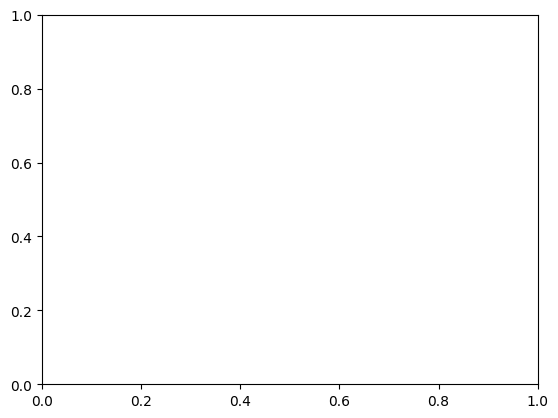

In [187]:
cancer_df.plot(kind="scatter", x="povertyPercent", y="TARGET_deathRate", alpha=0.2)

In [ ]:
cancer_df.plot(kind="scatter", x="medIncome", y="TARGET_deathRate", alpha=0.2)

In [ ]:
# Upon first glance it doesn't seem like there are any worthwhile new data points we could make from existing ones.
# We could possibly scale down median age, but I doubt that age generally plays a significant role in cancer mortality rate.

In [ ]:
# Now we do data cleaning
# I'd like to operate only on povertyPercent, PctPublicCoverage, medIncome to predict TARGET_deathRate

In [ ]:
# How to grab names of all columns
cancer_df.columns

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean', missing_values=np.nan)

# To use SimpleImputer, we must eliminate the non-numerical values.
# Check column types

categ_attribs = []
for i in range (len(cancer_df.select_dtypes(include=object).columns)):
    categ_attribs.append(cancer_df.select_dtypes(include=object).columns[i])

categ_attribs


irrelevant_info = list(('avgAnnCount', 'avgDeathsPerYear', 'incidenceRate',
       'popEst2015', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24',
       'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'))


cancer_numerical = cancer_df.drop(categ_attribs, axis=1)
# cancer_numerical = cancer_df[["medIncome", "povertyPercent", "PctPublicCoverage"]]

cancer_numerical = cancer_numerical.drop(irrelevant_info, axis=1)

cancer_numerical.head()

cancer_numerical.isnull().sum() #PctPrivateCoverageAlone, PctEmployed16_Over, PctSomeCol18_24

# Transform missing values into np.nan

imputer.fit_transform(cancer_numerical)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), ('std_scaler', StandardScaler())])
full_pipeline = Pipeline([('num', numeric_pipeline)])
cancer_prepped = full_pipeline.fit_transform(cancer_numerical)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
cancer_labels_truncated = cancer_labels
lin_reg.fit(cancer_prepped[:2437], cancer_labels_truncated) # <- This line something went wrong

In [ ]:
some_data = cancer_numerical.iloc[:5]
some_labels = cancer_labels_truncated.iloc[:5]
some_data_prepared = full_pipeline.fit_transform(some_data)
print(f'Predictions: {lin_reg.predict(some_data_prepared)}')

# amazing improvement

In [ ]:
print(f'Labels: {list(some_labels)}')

In [ ]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(cancer_prepped)
lin_mse = mean_squared_error(cancer_labels_truncated, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

In [ ]:
# Model is working now! We must now fine tune, visualize, and interpret the model.